<div style="border:solid Chocolate 2px; padding: 40px">
    
 <b>Добрый день, Александр!</b>
    
Меня зовут Ксения Цыганова, и я буду комментировать твою работу и помогать тебе сделать ее сильнее. В Практикуме мы общаемся на «ты», но если тебе это будет некомфортно, пожалуйста, скажи, и мы будем обращаться друг к другу на «вы».
    
Все мои комментарии делятся на три вида:

    
👍 Здесь все отлично, идем дальше! - <font color='green'> зеленый цвет </font>
    
💡 Все хорошо, однако, можно оптимизировать или рассмотреть другие способы (необязательно для исполнения, чтобы пройти дальше) - <font color='gold'>желтый цвет</font>
    
🤔 Необходимо внести исправления, без которых я не смогу принять проект - <font color='red'>красный цвет</font>
    
    
Свои комментарии я буду выделять заголовком «комментарий ревьюера». Пожалуйста, не удаляй их, это поможет сократить время проверки на повторных ревью.Ты также можешь писать свои комментарии к моим и выделять их любым понравившимся способом, отличным от моего. Если у тебя будут возникать вопросы в течение нашей работы, я с радостью на них отвечу.

Цель моего ревью не критика и не возможность дать тебе готовые ответы, это способ привести тебя в нужное русло, чтобы ты смог развить собственные идеи и решения. Твой будущий работодатель будет поступать похожим образом. 
        
   <b>У тебя все получится!</b>
    
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Привет! Меня зовут Александр, приятно познакомиться! Буду рад улучшить свою работу с твоей помощью.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
Привет, Александр, буду рада помочь!

# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

Заказчик этого исследования — сеть отелей «Как в гостях».
Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.
Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть вступительный комментарий

### Шаг 1. Откройте файлы с данными

Для достижения поставленной задачи необходимо будет протестировать 3 различных модели машинного обучения и выбрать ту, предсказания который принесут компании наибольшую прибыль. Перед исследованием требуется провести работу над входными данными - предобработка, исследовательский анализ данных и последующая нормализация. Далее потребуется рассчитать прибыль компании без введения депозитов и затрат на внедрение моделей машинного обучения. Затем нужно построить модели для предсказания отмены бронирования, на основе чего снизить предстоящий убыток введением депозита. В конце оценим прибыль компании после внедрения депозита.

In [1]:
!pip install imblearn

     |████████████████████████████████| 235 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 65.9 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


<div class="alert alert-warning">
    <h2> Комментарий ревьюера №3<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Во избежание неприятных ситуаций, пожалуйста, не забывай добавлять установку используемых библиотек и версии модулей, используемых в проекте. Так как иначе при перезагрузке на платформе код выдает ошибку и ревьюер имеет право отправить проект на доработку без проверки.
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Да, хорошо. Я видел, что присутствует данная ошибка но не знал как это реализовать в тетрадке.
</div>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

from math import ceil

from pandas.api.types import is_string_dtype

from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import DataConversionWarning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

In [3]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

    
<b>Все отлично!👍:</b> 
    
Отлично, что все импорты собраны в начале проекта. Это поможет в случае чего сразу увидеть, какие библиотеки следует доустановить.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

"Согласно руководству по написанию кода PEP8 все импорты должны располагаться сразу после комментариев к модулю и строк документации, но перед объявлением констант. При этом группировать их желательно в следующем порядке:

импорты из стандартной библиотеки,
импорты из сторонних библиотек,
импорты пользовательских модулей текущего проекта."
        
И между группами стоит оставлять пустую строку.
        
        
Вот еще хорошая статья:
        
https://okpython.net/python/python_uchebnik/osnovy/moduli_i_pakety_v_python.html
        
Какие модули входят в стандартную библиотеку можно посмотреть вот здесь:
        
https://docs.python.org/3/library/exceptions.html#warnings
      
    

In [4]:
try:
    hotel_test = pd.read_csv('datasets/hotel_test.csv')
    hotel_train = pd.read_csv('datasets/hotel_train.csv')
except Exception as info:
    display(info)
    hotel_test = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_test.csv')
    hotel_train = pd.read_csv('https://code.s3.yandex.net/datasets/hotel_train.csv')

FileNotFoundError(2, 'No such file or directory')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для загрузки данных можно использовать библиотеку os или констукцию try/except. Это поможет работать с проектом как локально, так и через Jupyter Hub, не внося дополнительных правок.
        
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Использовал конструкцию try/except.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

    
<b>Все отлично!👍</b> 

In [5]:
def describe_dataframe(dataframe):
    display(dataframe.head(10))
    display(dataframe.info())
    display(dataframe.describe(percentiles=[.5]).T)
    print(f"Количество дублированных строк: {dataframe.duplicated().sum()}")

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что оптимизируешь свой код с помощью пользовательских функций.

Описание колонок по условию:
В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:
id — номер записи;
adults — количество взрослых постояльцев;
arrival_date_year — год заезда;
arrival_date_month — месяц заезда;
arrival_date_week_number — неделя заезда;
arrival_date_day_of_month — день заезда;
babies — количество младенцев;
booking_changes — количество изменений параметров заказа;
children — количество детей от 3 до 14 лет;
country — гражданство постояльца;
customer_type — тип заказчика:
Contract — договор с юридическим лицом;
Group — групповой заезд;
Transient — не связано с договором или групповым заездом;
Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
days_in_waiting_list — сколько дней заказ ожидал подтверждения;
distribution_channel — канал дистрибуции заказа;
is_canceled — отмена заказа;
is_repeated_guest — признак того, что гость бронирует номер второй раз;
lead_time — количество дней между датой бронирования и датой прибытия;
meal — опции заказа:
SC — нет дополнительных опций;
BB — включён завтрак;
HB — включён завтрак и обед;
FB — включён завтрак, обед и ужин.
previous_bookings_not_canceled — количество подтверждённых заказов у клиента;
previous_cancellations — количество отменённых заказов у клиента;
required_car_parking_spaces — необходимость места для автомобиля;
reserved_room_type — тип забронированной комнаты;
stays_in_weekend_nights — количество ночей в выходные дни;
stays_in_week_nights — количество ночей в будние дни;
total_nights — общее количество ночей;
total_of_special_requests — количество специальных отметок.

#### Тестовый датафрейм

In [6]:
describe_dataframe(hotel_test)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7
5,6091,1,52.0,2017,January,1,1,2,5,1.0,...,0,0,0,A,0,0,Transient,0,0,7
6,6092,1,143.0,2017,January,1,2,1,1,2.0,...,0,0,0,A,1,0,Transient,0,1,2
7,6093,1,21.0,2017,January,1,2,1,3,2.0,...,0,0,0,A,0,0,Transient,0,1,4
8,6094,1,89.0,2017,January,1,2,1,3,2.0,...,0,0,0,E,0,0,Transient,0,0,4
9,6095,1,48.0,2017,January,1,2,1,4,2.0,...,0,0,0,A,1,0,Transient,0,2,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

None

,count,mean,std,min,50%,max
id,32412.0,60131.505183,29953.586177,6086.0,53394.5,97903.0
is_canceled,32412.0,0.388467,0.487409,0.0,0.0,1.0
lead_time,32412.0,97.587869,86.507146,0.0,76.0,373.0
arrival_date_year,32412.0,2017.000000,0.000000,2017.0,2017.0,2017.0
arrival_date_week_number,32412.0,17.804054,9.177384,1.0,18.0,35.0
arrival_date_day_of_month,32412.0,15.656948,8.766429,1.0,15.5,31.0
stays_in_weekend_nights,32412.0,0.867888,0.853394,0.0,1.0,4.0
stays_in_week_nights,32412.0,2.340090,1.375170,0.0,2.0,6.0
adults,32412.0,1.858602,0.489341,0.0,2.0,4.0
children,32412.0,0.083765,0.343470,0.0,0.0,3.0


Количество дублированных строк: 0


Данные не имеют пропусков или дублированных строк.
Колонки: [arrival_date_month, meal, country, distribution_channel, reserved_room_type, customer_type] имеют категориальные значения. Исследуем их для выявления ошибок или аномалий их заполнения. Другие колонки имеют количественные значения, в них нет выбивающихся значений. Даты в реальных диапазонах.

### Шаг 2. Предобработка и исследовательский анализ данных

Пропишем функцию для исследования наборов данных.

In [7]:
def display_objects(dataframe):
    object_columns = filter(lambda column: is_string_dtype(dataframe[column]), dataframe.columns)
    for i, column in enumerate(object_columns, 1):
        display(f"{i} Колонка: {column}")
        display(dataframe[column].value_counts())

In [8]:
def display_digits(dataframe):
    object_columns = filter(lambda column: not is_string_dtype(dataframe[column]), dataframe.columns)
    for i, column in enumerate(object_columns, 1):
        display(f"{i} Колонка: {column}")
        display(dataframe[column].value_counts())

#### Исследование тестового датафрейма

In [9]:
display_objects(hotel_test)

'1 Колонка: arrival_date_month'

May         5262
April       4878
June        4580
March       4277
July        3626
February    3543
January     3150
August      3096
Name: arrival_date_month, dtype: int64

'2 Колонка: meal'

BB           24684
SC            5035
HB            2399
SC             258
FB              36
Name: meal, dtype: int64

'3 Колонка: country'

PRT    9887
GBR    3927
FRA    3477
DEU    2378
ESP    1932
       ... 
FRO       1
SDN       1
TJK       1
ASM       1
LIE       1
Name: country, Length: 143, dtype: int64

'4 Колонка: distribution_channel'

TA/TO        27083
Direct        3642
Corporate     1602
GDS             85
Name: distribution_channel, dtype: int64

'5 Колонка: reserved_room_type'

A                   23471
D                    6123
E                    1644
F                     503
G                     278
C                     201
B                     192
Name: reserved_room_type, dtype: int64

'6 Колонка: customer_type'

Transient          27461
Transient-Party     4427
Contract             359
Group                165
Name: customer_type, dtype: int64

1) Всего в тестовом датафрейме представлены первые 8 месяцев 2017 года.

2) По условию meal — опции заказа:
    SC — нет дополнительных опций;
    BB — включён завтрак;
    HB — включён завтрак и обед;
    FB — включён завтрак, обед и ужин.

В одну из опций попал пробел или символ табуляции. Исправим ошибку.

In [10]:
# hotel_test['meal'][hotel_test['meal'].str.contains("SC")] = "SC"
hotel_test['meal'] = hotel_test['meal'].str.strip()
hotel_test['meal'].value_counts()

BB    24684
SC     5293
HB     2399
FB       36
Name: meal, dtype: int64

В некоторых количественных переменных наблюдаются аномально большие значения, построим для них графики.

array([[<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>],
       [<AxesSubplot:title={'center':'required_car_parking_spaces'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'total_of_special_requests'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'total_nights'}>,
        <AxesSubplot:title={'center':'booking_changes'}>]], dtype=object)

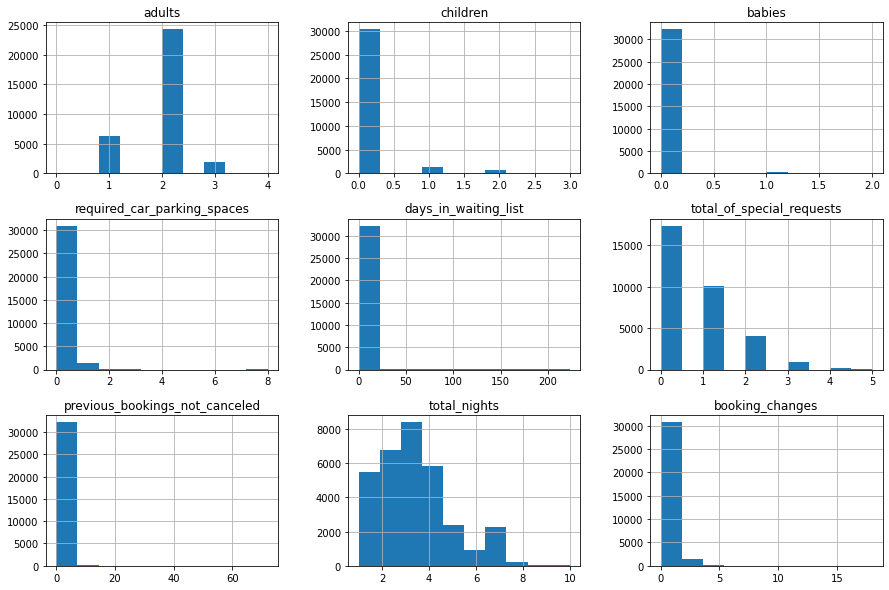

In [11]:
hotel_test[
    ['adults', 'children', 'babies', 'required_car_parking_spaces', 'days_in_waiting_list', 
     'total_of_special_requests', 'previous_bookings_not_canceled', 'total_nights', 'booking_changes']
].hist(figsize=(15, 10))

Остальные колонки не имеют каких-то выраженых аномалий или отклонений

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
У строк есть удобный метод strip, который позволяет убирать лишние пробелы
        
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Исправил, сразу не догадался...
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

    
<b>Все отлично!👍</b> 

#### Исследование тренировочного датафрейма

In [12]:
describe_dataframe(hotel_train)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3
5,5,1,75.0,2015,July,27,1,0,3,2.0,...,0,0,0,D,0,0,Transient,0,0,3
6,6,1,23.0,2015,July,27,1,0,4,2.0,...,0,0,0,E,0,0,Transient,0,0,4
7,7,0,18.0,2015,July,27,1,0,4,2.0,...,0,0,0,G,1,0,Transient,0,1,4
8,8,0,68.0,2015,July,27,1,0,4,2.0,...,0,0,0,D,0,0,Transient,0,3,4
9,9,0,37.0,2015,July,27,1,0,4,2.0,...,0,0,0,E,0,0,Contract,0,0,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

None

,count,mean,std,min,50%,max
id,65229.0,43544.069172,25614.858971,0.0,40554.0,84121.0
is_canceled,65229.0,0.368609,0.482431,0.0,0.0,1.0
lead_time,65229.0,96.337917,96.127545,0.0,64.0,374.0
arrival_date_year,65229.0,2015.719021,0.449481,2015.0,2016.0,2016.0
arrival_date_week_number,65229.0,31.339772,13.464024,1.0,34.0,53.0
arrival_date_day_of_month,65229.0,15.847813,8.748182,1.0,16.0,31.0
stays_in_weekend_nights,65229.0,0.825185,0.853477,0.0,1.0,4.0
stays_in_week_nights,65229.0,2.224793,1.354992,0.0,2.0,6.0
adults,65229.0,1.836576,0.480245,0.0,2.0,4.0
children,65229.0,0.074890,0.334243,0.0,0.0,3.0


Количество дублированных строк: 0


Структура тренировочного датафрейма соответствует тестовому

In [13]:
display_objects(hotel_train)

'1 Колонка: arrival_date_month'

October      9255
September    8782
August       6678
November     5761
July         5718
December     5497
April        4804
May          4677
June         4659
March        4148
February     3358
January      1892
Name: arrival_date_month, dtype: int64

'2 Колонка: meal'

BB           51697
HB            7292
SC            5274
SC             515
FB             451
Name: meal, dtype: int64

'3 Колонка: country'

PRT    28831
FRA     5974
GBR     5109
ESP     4900
DEU     3887
       ...  
LCA        1
MMR        1
SMR        1
BDI        1
BHR        1
Name: country, Length: 155, dtype: int64

'4 Колонка: distribution_channel'

TA/TO        54454
Direct        6853
Corporate     3823
GDS             99
Name: distribution_channel, dtype: int64

'5 Колонка: reserved_room_type'

A                   50501
D                    9387
E                    2448
F                    1213
B                     860
G                     592
C                     228
Name: reserved_room_type, dtype: int64

'6 Колонка: customer_type'

Transient          45493
Transient-Party    16703
Contract            2746
Group                287
Name: customer_type, dtype: int64

Также устраним ошибку с типами питания.

In [14]:
# hotel_train['meal'][hotel_train['meal'].str.contains("SC")] = "SC"
hotel_train['meal'] = hotel_train['meal'].str.strip()
hotel_train['meal'].value_counts()

BB    51697
HB     7292
SC     5789
FB      451
Name: meal, dtype: int64

В некоторых количественных переменных наблюдаются аномально большие значения, построим для них графики.

array([[<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>],
       [<AxesSubplot:title={'center':'required_car_parking_spaces'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'total_of_special_requests'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'total_nights'}>,
        <AxesSubplot:title={'center':'booking_changes'}>]], dtype=object)

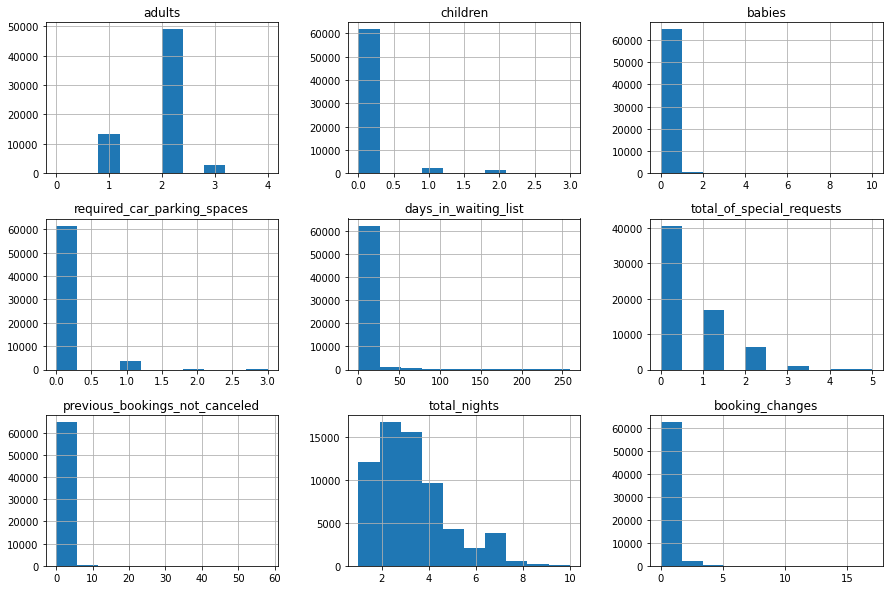

In [15]:
hotel_train[
    ['adults', 'children', 'babies', 'required_car_parking_spaces', 'days_in_waiting_list', 
     'total_of_special_requests', 'previous_bookings_not_canceled', 'total_nights', 'booking_changes']
].hist(figsize=(15, 10))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что исследуешь оба датафрейма.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Стоит построить несколько графиков для переменных.
    
Также стоит проверить данные на аномальные значения.
    
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Графики по каждому датасету добавил, в выводе к параграфу отражены наблюдения и методики борьбы с аномальными значениями.
</div>
    

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
        
Для визуализации распределений данных по категориям больше подходят графики столбчатых диаграмм
        
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Можно провести EDA c точки зрения вероятности отмены брони.

#### Масштабирование и кодирование данных

Для разработки ML-модели потребуется преобразовать категориальные значения к количественным, после чего провести нормализацию данных.
Для кодирования категорий используем технику OrdinalEncoding. Для нормализации данных используем StandardScaler.

Также упразним колонку id, т.к. это идентификатор - сделаем его идентификатором датафрейма. Данная колонка только помешает обучению моделей, т.к. не несет никакой информации.

In [16]:
target_train = hotel_train['is_canceled']
features_train = hotel_train.drop(['is_canceled'], axis=1)

In [17]:
target_test = hotel_test['is_canceled']
features_test = hotel_test.drop(['is_canceled'], axis=1)

In [18]:
categorical_columns = list(filter(lambda column: is_string_dtype(features_train[column]), features_train.columns))
numeric_columns = list(filter(lambda column: not is_string_dtype(features_train[column]), features_train.columns))

In [19]:
ohe_encoder = OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist')
ohe_encoder.fit(features_train[categorical_columns])

OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist')

In [20]:
features_train_encoded = pd.DataFrame(
    ohe_encoder.transform(features_train[categorical_columns]).toarray(),
    columns=ohe_encoder.get_feature_names_out(categorical_columns),
)
features_train = pd.concat((features_train[numeric_columns], features_train_encoded), axis=1)

In [21]:
features_test_encoded = pd.DataFrame(
    ohe_encoder.transform(features_test[categorical_columns]).toarray(),
    columns=ohe_encoder.get_feature_names_out(categorical_columns)
)
features_test = pd.concat(
    (features_test[numeric_columns], features_test_encoded),
    axis=1
)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [22]:
features_train.head()

,id,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,7.0,2015,27,1,0,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,14.0,2015,27,1,0,2,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,2015,27,1,0,2,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,9.0,2015,27,1,0,2,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,85.0,2015,27,1,0,3,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
target_test.index = features_test['id']
features_test.index = features_test['id']
features_test.drop(['id'], axis=1, inplace=True)

In [24]:
target_train.index = features_train['id']
features_train.index = features_train['id']
features_train.drop(['id'], axis=1, inplace=True)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
    
Ты молодец, алгоритм правильный. 
    
Только обрати, пожалуйста, внимание, что в кодер также попадают и кодируются чилсенные признаки. Из-за этого теряются исходные свойства их распределения. Стоит это поправить и проследить, чтобы в кодер попадали только категориальные признаки.
    
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
  Было трудно, но поправил.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Ты молодец!

In [25]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train = pd.DataFrame(
    scaler.transform(features_train),
    columns=features_train.columns,
    index=features_train.index)

features_test = pd.DataFrame(
    scaler.transform(features_test),
    columns=features_test.columns,
    index=features_test.index)

describe_dataframe(features_train)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
id,,,,,,,,,,,,,,,,,,,,,
0,-0.929376,-1.599681,-0.322326,-1.697258,-0.966858,-0.903918,-1.741989,-0.224060,-0.073248,-0.167058,...,-2.248051,-0.115587,-0.059225,-0.409999,-0.197466,-0.137653,-0.095702,-0.066478,0.658654,-0.586692
1,-0.856555,-1.599681,-0.322326,-1.697258,-0.966858,-0.165901,0.340296,-0.224060,-0.073248,-0.167058,...,0.444830,-0.115587,-0.059225,-0.409999,-0.197466,-0.137653,-0.095702,-0.066478,0.658654,-0.586692
2,-1.002196,-1.599681,-0.322326,-1.697258,-0.966858,-0.165901,0.340296,-0.224060,-0.073248,-0.167058,...,-2.248051,-0.115587,16.884671,-0.409999,-0.197466,-0.137653,-0.095702,-0.066478,0.658654,-0.586692
3,-0.908570,-1.599681,-0.322326,-1.697258,-0.966858,-0.165901,0.340296,-0.224060,-0.073248,-0.167058,...,-2.248051,-0.115587,16.884671,-0.409999,-0.197466,-0.137653,-0.095702,-0.066478,0.658654,-0.586692
4,-0.117948,-1.599681,-0.322326,-1.697258,-0.966858,0.572116,0.340296,-0.224060,-0.073248,-0.167058,...,0.444830,-0.115587,-0.059225,-0.409999,-0.197466,-0.137653,-0.095702,-0.066478,0.658654,-0.586692
5,-0.221977,-1.599681,-0.322326,-1.697258,-0.966858,0.572116,0.340296,-0.224060,-0.073248,-0.167058,...,0.444830,-0.115587,-0.059225,2.439030,-0.197466,-0.137653,-0.095702,-0.066478,0.658654,-0.586692
6,-0.762929,-1.599681,-0.322326,-1.697258,-0.966858,1.310134,0.340296,-0.224060,-0.073248,-0.167058,...,0.444830,-0.115587,-0.059225,-0.409999,5.064172,-0.137653,-0.095702,-0.066478,0.658654,-0.586692
7,-0.814943,-1.599681,-0.322326,-1.697258,-0.966858,1.310134,0.340296,2.767799,-0.073248,-0.167058,...,0.444830,-0.115587,-0.059225,-0.409999,-0.197466,-0.137653,10.449121,-0.066478,0.658654,-0.586692
8,-0.294797,-1.599681,-0.322326,-1.697258,-0.966858,1.310134,0.340296,-0.224060,-0.073248,-0.167058,...,0.444830,-0.115587,-0.059225,2.439030,-0.197466,-0.137653,-0.095702,-0.066478,0.658654,-0.586692


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65229 entries, 0 to 84121
Columns: 197 entries, lead_time to customer_type_Transient-Party
dtypes: float64(197)
memory usage: 98.5 MB


None

,count,mean,std,min,50%,max
lead_time,65229.0,-3.311487e-17,1.000008,-1.002196,-0.336409,2.888498
arrival_date_year,65229.0,-1.588817e-13,1.000008,-1.599681,0.625124,0.625124
arrival_date_week_number,65229.0,0.000000e+00,1.000008,-2.253413,0.197582,1.608761
arrival_date_day_of_month,65229.0,2.091466e-17,1.000008,-1.697258,0.017397,1.732052
stays_in_weekend_nights,65229.0,1.067519e-17,1.000008,-0.966858,0.204828,3.719888
...,...,...,...,...,...,...
reserved_room_type_F,65229.0,-1.612171e-17,1.000008,-0.137653,-0.137653,7.264636
reserved_room_type_G,65229.0,-1.132877e-17,1.000008,-0.095702,-0.095702,10.449121
customer_type_Group,65229.0,-1.830032e-17,1.000008,-0.066478,-0.066478,15.042564
customer_type_Transient,65229.0,4.182931e-17,1.000008,-1.518248,0.658654,0.658654


Количество дублированных строк: 21606


#### <b>Выводы к параграфу:</b> 
    Был проведен исследовательский анализ данных, в ходе которого были устранены недочеты данных, такие как пробелы и символы табуляции в колонках и значениях датафреймов. Также были исследованы аномальные значения в колонках с количество постояльцев, временем подтверждения заказа, машино-мест и общим временем пребывания. Данные не имеют неестественных или явно ошибочных значений, 10 детей и 8 машин - это не частое, но возможное требование. Модель машинного обучения должна учитывать экстравагантные предпочтения постаяльцев, поэтому данные будут приняты в работы наряду с остальными.
    Далее данные были кодированы и нормализованы для оптимизации параметров моделей машинного обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Масштабирование проведено корректно, молодец.

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.
В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня.
Стоимость номеров отеля:
категория A: за ночь — 1 000, разовое обслуживание — 400;
категория B: за ночь — 800, разовое обслуживание — 350;
категория C: за ночь — 600, разовое обслуживание — 350;
категория D: за ночь — 550, разовое обслуживание — 150;
категория E: за ночь — 500, разовое обслуживание — 150;
категория F: за ночь — 450, разовое обслуживание — 150;
категория G: за ночь — 350, разовое обслуживание — 150.
В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.
Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.
На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

Вычислим прибыль отеля и оцените прибыль отеля без внедрения депозитов.

In [26]:
room_service_costs = {  # reserved_room_type
    "A": 400,
    "B": 350,
    "C": 350,
    "D": 150,
    "E": 150,
    "F": 150,
    "G": 150
}
season_coefficients = {  # arrival_date_month
    "October": 1.2,
    "September": 1.2,
    "August": 1.4,
    "November": 1.2,
    "July": 1.4,
    "December": 1,
    "April": 1.2,
    "May": 1.2,
    "June": 1.4,
    "March": 1.2,
    "February": 1,
    "January": 1
}
room_costs = {
    "A": 1000,
    "B": 800,
    "C": 600,
    "D": 550,
    "E": 500,
    "F": 450,
    "G": 350
}

In [27]:
def get_profit(row):
    service_cost = room_service_costs[row['reserved_room_type'].strip()]
    room_cost = room_costs[row['reserved_room_type']]
    season_coefficient = season_coefficients[row['arrival_date_month']]
    if not row['is_canceled']:
        revenue = row['total_nights'] * room_cost * season_coefficient
        losses = service_cost * row['num_cleaning']
        return revenue - losses
    return -(service_cost + room_cost * season_coefficient)

# после этого просто суммируем столбец через sum

In [28]:
hotel_test['reserved_room_type'] = hotel_test['reserved_room_type'].str.strip()

In [29]:
hotel_test['num_cleaning'] = hotel_test['total_nights'].apply(lambda x: ceil(x / 2))

In [30]:
hotel_test['profit'] = hotel_test.apply(get_profit, axis=1)

In [31]:
full_revenue = hotel_test['profit'][hotel_test['profit'] > 0].sum()
f"Прибыль компании без учета убытков от отмены бронирования: {full_revenue} у.е."

'Прибыль компании без учета убытков от отмены бронирования: 53342330.0 у.е.'

In [32]:
full_losses = hotel_test['profit'][hotel_test['profit'] < 0].sum()
f"Убыток компании от отмены бронирования: {full_losses} у.е."

'Убыток компании от отмены бронирования: -18041560.0 у.е.'

In [33]:
revenue_without_deposite = full_revenue + full_losses

In [34]:
f"Прибыль компании без внедрения депозита: {revenue_without_deposite} у.е."

'Прибыль компании без внедрения депозита: 35300770.0 у.е.'

In [35]:
mean_profit = hotel_test['profit'].mean()
f"Средняя прибыль компании от одного бронирования: {mean_profit: .5} у.е."

'Средняя прибыль компании от одного бронирования:  1089.1 у.е.'

С помощью внедрения депозитов планируется увеличить прибыль компании более чем на 400т.у.е. за 8 месяцев (представленных в тестовом датафрейме).
Также необходимо повысить среднюю прибыль с одного бронирования.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
    
прибыль до внедрения депозитов расчитана верно.

### Шаг 4. Разработка модели ML

Рассмотрим 4 метрики для оценки точности модели:
- accuracy
- precision
- recall
- f1score

Полнота (recall) и точность (precision) оценивают качество прогноза положительного класса с разных позиций. Recall описывает, как хорошо модель разобралась в особенностях этого класса и распознала его. Precision выявляет, не переусердствует ли модель, присваивая положительные метки. Accuracy показывает насколько часто модель предсказывает целевую метрику.
В данном случае важны все 3 метрики. Контролировать их параллельно помогают агрегирующие метрики, одна из которых — F1-мера (англ. F1-score), а также метрика auc_roc. Это среднее гармоническое полноты и точности. Единица в F1 означает, что соотношение полноты и точности равно 1:1.
Выберем f1score определяющей метрикой, в дополнение к ней рассмотрим метрику roc_auc.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
   
Отлично, что есть обоснование выбора метрики.

In [36]:
def roc_graph(tv, pv):
    fpr, tpr, thresholds = roc_curve(tv, pv)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.grid()
    plt.show()

Для начала проверим модель на адекватность.

0.5595626958202786

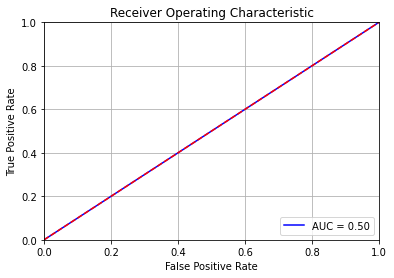

In [37]:
display(f1_score(target_test, pd.Series(1, index=target_test.index)))
roc_graph(target_test, pd.Series(1, index=target_test.index))

f1 метрика неадекватной модели высока, но график AUC-ROC лежит по диагонали.

Оценим дисбаланс классов в целевой метрике, в этом нам поможет accuracy_score:

In [38]:
accuracy_score(target_test, pd.Series(1, index=target_test.index))

0.3884672343576453

Наблюдается явный дисбаланс классов в сторону отсутствия отмены бронирования.

<AxesSubplot:>

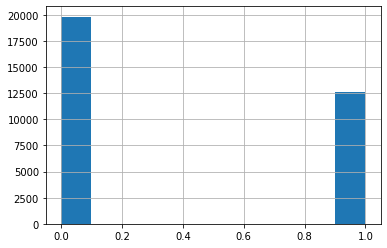

In [39]:
target_test.hist()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть сравнение с константной моделью.


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Стоит также проверить целевую переменную на ниличие дисбаланса классов.
    
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Добавил проверку дисбаланса классов, добавил график для целевого признака.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

#### Борьба с дисбалансом

Для борьбы с дисбалансом будем использовать класс SMOTE, а для апскейлинга при кросс-валидации используем **pipeline** из библиотеки imblearn.

Определим фолд для однородной разбивки данных:

In [40]:
kf = KFold(n_splits=5, random_state=32123, shuffle=True)


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №3<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Посмотри, пожалуйста, сейчас код выдает ошибку.
    
Кроме того изменение баланса классов в первоначальных данных нужно производить только на обучающей выборке, а в случае кросс-валидации ещё и только на фолдах в состоянии обучения. Этот момент учитывает **pipeline** в своей работе.
    
В тестовом фолде ведь баланс классов должен соответствовать балансу на исходной выборке, чтобы была возможность оценить потенциальное смещение модели
    
Если используешь кросс-валидацию, то upsampling или downsampling надо вписывать в pipeline с cv. Посмотри, пожалуйста, pipeline из библиотеки imblearn, там он учитывает эту проблему.

Вот здесь можно прочесть про это и посмотреть примеры.   
    
https://academy.yandex.ru/handbook/ml/article/kross-validaciya
    
https://imbalanced-learn.org/stable/common_pitfalls.html
    
https://datascience.xyz/practice/kak-delat-kross-validaciju-pri-apsemplinge-dannyh.html
    
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Ошибку устранил. Всё переделал.
</div>

#### Исследование различных моделей машинного обучения

##### Модель дерева решений

Определим набор параметров для модели дерева решений:

In [41]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 18, 2),
    'random_state': [32123]
}

Создадим пайплайн:

In [42]:
dt_pipeline = make_pipeline(SMOTE(random_state=32123),
                            DecisionTreeClassifier())

Создадим сетку моделей:

In [43]:
new_params = {'decisiontreeclassifier__' + key: params[key] for key in params}
grid_dt = GridSearchCV(dt_pipeline, param_grid=new_params, cv=kf, scoring='roc_auc',
                         return_train_score=True)

Определим наилучшие параметры модели дерева решений:

In [44]:
grid_dt.fit(features_train, target_train)
grid_dt.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 12,
 'decisiontreeclassifier__random_state': 32123}

In [45]:
f"Средняя оценка лучшей dt модели: {grid_dt.best_score_}, Глубина дерева: {grid_dt.best_params_['decisiontreeclassifier__max_depth']}, Лучший критерий: {grid_dt.best_params_['decisiontreeclassifier__criterion']}"

'Средняя оценка лучшей dt модели: 0.9157977512904674, Глубина дерева: 12, Лучший критерий: entropy'


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
    
В процессе анализа качество моделей стоит проверить на кросс-валидации.
    
Выбрать лучшую модель, исходя из полученных результатов.
    
И затем только ее проверить на тестовой выборке.
    
Использование тестовой выборки до этапа тестирования стоит исключить.
    
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Исправил исследование, тестирование и выводы.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для вычисления среднего результата кросс-валидации можно использовать метод mean

##### Модель случайного леса

Определим набор параметров для модели случайного леса:

In [46]:
params = {'n_estimators': range(50, 250, 50),
 'max_depth': range(4, 14, 2),
 'random_state': [32123]}

Создадим пайплайн:

In [47]:
rf_pipeline = make_pipeline(SMOTE(random_state=32123),
                            RandomForestClassifier())

Создадим сетку моделей:

In [48]:
rf_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_rf = GridSearchCV(rf_pipeline, param_grid=rf_params, cv=kf, scoring='roc_auc',
                       return_train_score=True)

Определим наилучшие параметры модели случайного леса:

In [49]:
grid_rf.fit(features_train, target_train)
grid_rf.best_params_

{'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__random_state': 32123}

In [50]:
f"Средняя оценка лучшей rf модели: {grid_rf.best_score_}, Глубина дерева: {grid_rf.best_params_['randomforestclassifier__max_depth']}, Измерители: {grid_rf.best_params_['randomforestclassifier__n_estimators']}"

'Средняя оценка лучшей rf модели: 0.9178589181865462, Глубина дерева: 12, Измерители: 200'

##### Модель логистической регрессии

Определим набор параметров для модели логистической регрессии:

In [51]:
params = {'solver': ['liblinear'],
          'random_state': [32123]}

Создадим пайплайн:

In [52]:
lr_pipeline = make_pipeline(SMOTE(random_state=32123),
                            LogisticRegression())

Создадим сетку моделей:

In [53]:
lr_params = {'logisticregression__' + key: params[key] for key in params}
grid_lr = GridSearchCV(lr_pipeline, param_grid=lr_params, cv=kf, scoring='roc_auc',
                       return_train_score=True)

Определим наилучшие параметры модели логистической регрессии:

In [54]:
grid_lr.fit(features_train, target_train)
grid_lr.best_params_

{'logisticregression__random_state': 32123,
 'logisticregression__solver': 'liblinear'}

In [55]:
f"Средняя оценка лучшей lr модели: {grid_lr.best_score_}"

'Средняя оценка лучшей lr модели: 0.8773445615378282'

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Как минимум для 2х моделей стоит перебрать как минимум по 2 гиперпараметра. 
<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Добавил подбор criterion для DT модели.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Так как выяснилось, что есть дисбаланс, то стоит проводить обучение (кросс-валидацию) моделей с учетом дисбаланса. То есть стоит использовать тот или иной метод борьбы с дисбалансом.

<div class="alert alert-info", padding: 15px>
<strong>Комментарий студента:</strong>
    Борьба добавлена. Исмользовал готовую функциию SMOTE. Для теста соответственно никакой дисбаланс не учитывался, только при обучнии. Качество модели заметно повысилась! Спасибо!
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера №3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Спасибо за борьбу)
    
Да, молодец, что не меняешь изначальный баланс классов в тестовой выборке. Также еще нужно учесть, чтобы не менялся баланс классов у валидационных фолдов в процессе кросс-валидации. С этим поможет pipeline.
    
Выше написала подробнее.

##### Выводы: 
Наилучшими моделями, показавшими идентичный результат оказались DecisionTree и RandomForest. Обе модели показали метрику roc_auc = 0.92. Выберем для теста модель DecisionTree как самую легковесную.

#### Тестирование наилучшей модели

##### Тестирование модели дерева решений

In [56]:
best_dt_model = DecisionTreeClassifier(
    random_state=32123,
    max_depth=grid_dt.best_params_['decisiontreeclassifier__max_depth'],
    criterion=grid_dt.best_params_['decisiontreeclassifier__criterion'],
    splitter='best')
best_dt_model.fit(features_train, target_train)
best_predicted_valid = best_dt_model.predict(features_test)

In [57]:
best_dt_model_f1 = f1_score(target_test, best_predicted_valid)
display(f"f1 score наилучшей модели на тестовой выборке: {best_dt_model_f1}")

'f1 score наилучшей модели на тестовой выборке: 0.6288420554108454'

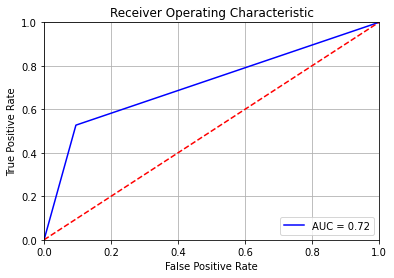

In [58]:
roc_graph(target_test, best_predicted_valid)

In [59]:
hotel_test['best_dt_model_predicted_valid'] = best_predicted_valid
hotel_test.query('best_dt_model_predicted_valid > 0 and profit < 0')

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,num_cleaning,profit,best_dt_model_predicted_valid
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,A,0,0,Transient,0,0,1,1,-1400.0,1
9,6095,1,48.0,2017,January,1,2,1,4,2.0,...,A,1,0,Transient,0,2,5,3,-1400.0,1
10,6096,1,31.0,2017,January,1,2,1,4,2.0,...,G,0,0,Transient,0,0,5,3,-500.0,1
12,6098,1,173.0,2017,January,1,2,1,5,2.0,...,G,2,0,Transient,0,1,6,3,-500.0,1
13,6099,1,23.0,2017,January,1,3,0,2,2.0,...,D,0,0,Transient,0,0,2,1,-700.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18301,70397,1,194.0,2017,May,21,25,0,3,2.0,...,D,0,0,Transient,0,0,3,2,-810.0,1
22331,87823,1,16.0,2017,April,15,12,0,1,1.0,...,A,0,0,Transient,0,0,1,1,-1600.0,1
22347,87839,1,13.0,2017,May,22,29,1,2,1.0,...,A,0,0,Transient,0,0,3,2,-1600.0,1
22350,87842,1,13.0,2017,May,22,29,1,2,1.0,...,A,0,0,Transient,0,0,3,2,-1600.0,1


Вычиcлим полученную с данных предсказаний прибыль: Так как депозит составляет 80% от суммы бронирования и уборки, следовательно, убытки составят только 20% от убытков в предсказанных моделью случаях.

In [60]:
hotel_test.loc[(hotel_test['best_dt_model_predicted_valid'] > 0) & (hotel_test['profit'] < 0), 'profit'] = hotel_test.query('best_dt_model_predicted_valid > 0 and profit < 0')['profit'] * 0.2

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что не проводишь весь расчет заново, а учитываешь только разницу в размере депозита.

In [61]:
full_revenue = hotel_test['profit'][hotel_test['profit'] > 0].sum()
f"Прибыль компании без учета убытков от отмены бронирования: {full_revenue} у.е."

'Прибыль компании без учета убытков от отмены бронирования: 53342330.0 у.е.'

In [62]:
full_losses = hotel_test['profit'][hotel_test['profit'] < 0].sum()
f"Убыток компании от отмены бронирования: {full_losses} у.е."

'Убыток компании от отмены бронирования: -10302912.0 у.е.'

In [63]:
revenue_with_deposite = full_revenue + full_losses

In [64]:
f"Прибыль компании с внедрением депозита: {revenue_with_deposite} у.е."

'Прибыль компании с внедрением депозита: 43039418.0 у.е.'

In [65]:
f"Прибыль компании от внедрения депозита: {revenue_with_deposite - revenue_without_deposite} у.е."

'Прибыль компании от внедрения депозита: 7738648.0 у.е.'

In [66]:
mean_profit = hotel_test['profit'].mean()
f"Средняя прибыль компании от одного бронирования: {mean_profit: .5} у.е."

'Средняя прибыль компании от одного бронирования:  1327.9 у.е.'

Результат таков: На протяжении 8 месяцев тестирования модели машинного обучения чистая прибыль компании увеличилась на 8 млн. 812 тыс. у.е., что в 22 раза превышает затраты на разработку и внедрение модели машинного обучения. Также средняя прибыль компании увеличилась на 280 у.е. или на 27%.

### Шаг 5. Опишите портрет «ненадёжного» клиента

Отделим клиентов, которым была предсказана отмена бронирования и изучим их особенности.

In [67]:
predicted = hotel_test[hotel_test['best_dt_model_predicted_valid'] > 0]

Проведем исследовательский анализ данных.

In [68]:
display_objects(predicted)

'1 Колонка: arrival_date_month'

May         1549
April       1507
June        1479
March       1124
July         768
February     756
January      698
August       643
Name: arrival_date_month, dtype: int64

'2 Колонка: meal'

BB    6668
SC    1383
HB     455
FB      18
Name: meal, dtype: int64

'3 Колонка: country'

PRT    5511
GBR     495
FRA     450
ESP     246
ITA     236
       ... 
TZA       1
MDV       1
IDN       1
PER       1
GNB       1
Name: country, Length: 82, dtype: int64

'4 Колонка: distribution_channel'

TA/TO        7856
Corporate     339
Direct        324
GDS             5
Name: distribution_channel, dtype: int64

'5 Колонка: reserved_room_type'

A    6314
D    1754
F     150
E     129
G      89
C      53
B      35
Name: reserved_room_type, dtype: int64

'6 Колонка: customer_type'

Transient          7790
Transient-Party     680
Contract             40
Group                14
Name: customer_type, dtype: int64

In [69]:
display_digits(hotel_test[hotel_test['best_dt_model_predicted_valid'] > 0])

'1 Колонка: id'

20482    1
49789    1
90777    1
6806     1
45715    1
        ..
50514    1
46412    1
52555    1
50506    1
53246    1
Name: id, Length: 8524, dtype: int64

'2 Колонка: is_canceled'

1    6639
0    1885
Name: is_canceled, dtype: int64

'3 Колонка: lead_time'

56.0     151
28.0     140
38.0     120
156.0    118
175.0    110
        ... 
353.0      1
346.0      1
285.0      1
356.0      1
245.0      1
Name: lead_time, Length: 350, dtype: int64

'4 Колонка: arrival_date_year'

2017    8524
Name: arrival_date_year, dtype: int64

'5 Колонка: arrival_date_week_number'

20    532
17    434
23    385
18    380
14    376
22    371
15    359
24    349
11    321
25    310
16    291
26    290
12    262
7     251
9     250
4     228
21    227
19    225
13    205
28    203
30    196
10    195
33    195
8     188
2     183
27    169
3     155
31    151
5     144
29    135
32    134
34    129
6     120
1     104
35     77
Name: arrival_date_week_number, dtype: int64

'6 Колонка: arrival_date_day_of_month'

15    475
26    408
19    353
9     349
14    334
23    331
8     329
1     328
20    308
17    304
25    291
6     279
21    275
13    273
28    272
2     271
3     266
4     263
16    260
12    253
27    245
5     244
30    244
18    240
11    237
24    225
10    207
22    199
29    175
7     165
31    121
Name: arrival_date_day_of_month, dtype: int64

'7 Колонка: stays_in_weekend_nights'

0    3791
2    2404
1    2295
4      20
3      14
Name: stays_in_weekend_nights, dtype: int64

'8 Колонка: stays_in_week_nights'

2    2618
3    2254
1    1886
4     716
5     597
0     405
6      48
Name: stays_in_week_nights, dtype: int64

'9 Колонка: adults'

2.0    6600
1.0    1350
3.0     550
0.0      20
4.0       4
Name: adults, dtype: int64

'10 Колонка: children'

0.0    7875
1.0     381
2.0     266
3.0       2
Name: children, dtype: int64

'11 Колонка: babies'

0.0    8507
1.0      16
2.0       1
Name: babies, dtype: int64

'12 Колонка: is_repeated_guest'

0    8463
1      61
Name: is_repeated_guest, dtype: int64

'13 Колонка: previous_cancellations'

0    8480
1      36
2       3
4       2
6       2
3       1
Name: previous_cancellations, dtype: int64

'14 Колонка: previous_bookings_not_canceled'

0     8454
1       28
2        7
7        5
4        5
6        4
3        3
5        3
9        2
14       2
21       1
15       1
30       1
27       1
13       1
8        1
19       1
18       1
64       1
16       1
71       1
Name: previous_bookings_not_canceled, dtype: int64

'15 Колонка: booking_changes'

0    8067
1     302
2     120
3      23
4       6
5       3
6       3
Name: booking_changes, dtype: int64

'16 Колонка: days_in_waiting_list'

0      8420
71        6
46        5
59        5
26        4
44        4
16        4
28        4
17        4
7         3
5         3
60        3
34        3
11        2
14        2
22        2
9         2
20        2
56        2
27        2
21        2
23        2
18        2
30        1
117       1
175       1
165       1
111       1
32        1
63        1
47        1
15        1
39        1
38        1
54        1
31        1
93        1
33        1
84        1
53        1
13        1
57        1
73        1
113       1
121       1
2         1
10        1
25        1
50        1
35        1
43        1
99        1
4         1
12        1
80        1
76        1
49        1
100       1
183       1
Name: days_in_waiting_list, dtype: int64

'17 Колонка: required_car_parking_spaces'

0    8507
1      17
Name: required_car_parking_spaces, dtype: int64

'18 Колонка: total_of_special_requests'

0    8008
1     383
2     118
3      13
4       2
Name: total_of_special_requests, dtype: int64

'19 Колонка: total_nights'

3     2752
2     2171
4     1443
1      819
5      622
7      480
6      174
8       38
10      14
9       11
Name: total_nights, dtype: int64

'20 Колонка: num_cleaning'

2    4195
1    2990
3     796
4     518
5      25
Name: num_cleaning, dtype: int64

'21 Колонка: profit'

-320.0      2730
-360.0      1620
-280.0       874
-162.0       514
-184.0       401
            ... 
 12000.0       1
 8330.0        1
 5560.0        1
 1460.0        1
 450.0         1
Name: profit, Length: 116, dtype: int64

'22 Колонка: best_dt_model_predicted_valid'

1    8524
Name: best_dt_model_predicted_valid, dtype: int64

На основе исследовательского анализа данных оцени портрет клиента, склонного к отказу от брони:
 В основном это компании из 2х человек, которые бронируют номер первый раз на пару ночей. Номер в основном самый дешевый, а самые частые месяцы для отказа - это май и июнь.
 В основном отказываются от бронирования португальцы и граждане США.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть описание ненадежного клиента.

### Шаг 6. Напишите общий вывод

В данной работе была проведена комплексная работа по исследованию данных и разработке оптимальной модели машинного обучения для выполнения поставленной бизнес-задачи уменьшения убытков компании от отмены забронированных номеров отеля.
В начале был проведен исследовательский анализ данных, в ходе которого были устранены недочеты данных, такие как пробелы и символы табуляции в колонках и значениях датафреймов. Далее данные были кодированы и нормализованы для оптимизации параметров моделей машинного обучения.
После исследования адекватности общей модели и определения параметров 3х различных моделей ML, для работы была выбрана модель DecisionTree с глубиной = 12 и критерием выбора 'entropy'.
Для выбора оптимальной модели была выбрана комплексная метрика F1 score, т.к. нас интересует баланс между полнотой и точностью определения отказа от бронирования. Данный продиктован тем, что излишняя полнота с недостатком точности определения может даже снизить прибыль компании. Падение прибыли в данном случаем может возникнуть из-за того, что неверно навязанный депозит может отпугнуть клиента, который не собирался отказываться от брони.
В итоге тестирования модели в 8ми месячный период прибыль отеля увеличилась на 8.800 млн. у.е., что более чем в 22 раза больше бюджета, выделенного на разработку модели. Также средняя прибыль от одного чека увеличилась на 27%.
Судя по предсказаниям лучшей модели в основном отказываются от номеров компании из 2х человек, которые бронируют номер первый раз на пару ночей. Номер в основном самый дешевый, а самые частые месяцы для отказа - это май и июнь.
 Чаще всего отказываются от бронирования португальцы и граждане США.
 По итогам работы затраты на разработку оказались гораздо меньше (в 22 раза) выручки компании от внедрения депозитов. Модель была введена успешно.

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту</b>

Александр, спасибо за работу! Проект хороший, продуманный, структурно выдержанный, аккуратный. Однако стоит внести некоторые исправления, чтобы можно было считать работу завершенной.

**Положительные моменты проекта, которые хочу еще раз подчеркнуть:**

1. Есть первичный анализ данных 
2. Есть описание клиента склонного к отмене брони
3. Исследовано 3 модели  ML
4. Есть обоснование выбора метрики
5. Расчет прибыли до и после внедрения системы депозитов верный



**Замечания, на которые стоит обратить внимание при будущей работе:**
    

    
    1. Как минимум для 2х моделей стоит подобрать как минимум по 2 гиперпараметра
    2. На тестовой выборке стоит проверить только лучшую модель
    3. Качество всех изучаемых моделей стоит оценить на кросс-валидации
    4. Стоит оценить баланс классов в целевой переменной
    5. Исправить порядковое кодирование
    6. Проверить данные на наличие аномальных значений, построить графики


Остальные комментарии ты найдешь выше.

**Желаю удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №2</b>

Александр, спасибо за работу,
    
в целом все отлично, осталось только учесть наличие дисбаланса при обучении моделей.
    
**Жду твой проект на следующее ревью**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №3</b>

Александр, спасибо за работу,
    
посмотри, пожалуйста:
    
    1. код выдает ошибку
    
    2. стоит вписать изменение баланса классов и cv в pipeline
    
**Жду твой проект на следующее ревью**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №4</b>

Александр, спасибо за работу,
    
**все хорошо, проект принимаю и жеалю успехов в дальнейшем!**